# CÓDIGO DA ATIVIDADE ANTERIOR

In [52]:
# IMPORTANDO AS BIBLIOTECAS NECESSÁRIAS

import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import train_test_split
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import accuracy_score, confusion_matrix
from sklearn.tree import DecisionTreeClassifier
#from sklearn.metrics import plot_confusion_matrix

PRIMEIRAS LINHAS DA SERIES FEATURES
0    1 tBodyAcc-mean()-X
1    2 tBodyAcc-mean()-Y
2    3 tBodyAcc-mean()-Z
3     4 tBodyAcc-std()-X
4     5 tBodyAcc-std()-Y
dtype: object
--------------------------------------------------------------------------------
PRIMEIRAS LINHAS DA SERIES SUBJECT_TRAIN
0    1
1    1
2    1
3    1
4    1
dtype: object
--------------------------------------------------------------------------------
PRIMEIRAS LINHAS DO DATAFRAME X_TRAIN
           1 tBodyAcc-mean()-X  2 tBodyAcc-mean()-Y  3 tBodyAcc-mean()-Z  \
  Subject                                                                  
0 1                   0.288585            -0.020294            -0.132905   
1 1                   0.278419            -0.016411            -0.123520   
2 1                   0.279653            -0.019467            -0.113462   
3 1                   0.279174            -0.026201            -0.123283   
4 1                   0.276629            -0.016570            -0.115362   

  

PRIMEIRAS LINHAS DO DATAFRAME X_TRAIN RESULTANTE
           1 tBodyAcc-mean()-X  2 tBodyAcc-mean()-Y  3 tBodyAcc-mean()-Z  \
  Subject                                                                  
0 1                   0.288585            -0.020294            -0.132905   
1 1                   0.278419            -0.016411            -0.123520   
2 1                   0.279653            -0.019467            -0.113462   
3 1                   0.279174            -0.026201            -0.123283   
4 1                   0.276629            -0.016570            -0.115362   

           4 tBodyAcc-std()-X  5 tBodyAcc-std()-Y  6 tBodyAcc-std()-Z  
  Subject                                                              
0 1                 -0.995279           -0.983111           -0.913526  
1 1                 -0.998245           -0.975300           -0.960322  
2 1                 -0.995380           -0.967187           -0.978944  
3 1                 -0.996091           -0.983403         

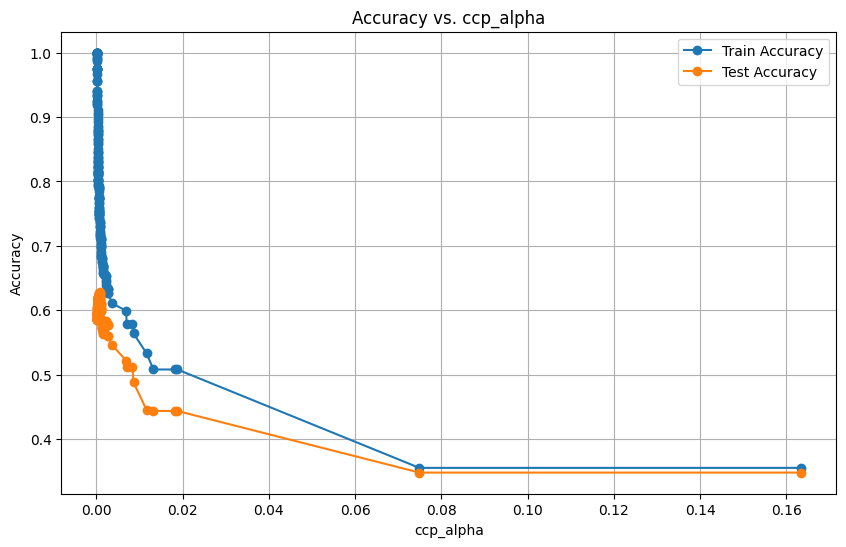

Melhor Árvore (ccp_alpha=0.0007237804775698069): Acurácia na Base de Teste = 0.6281
CPU times: total: 35.1 s
Wall time: 37.8 s


In [28]:
%%time

# FUNÇÃO QUE RECEBE O CAMINHO DO ARQUIVO COMO ARGUMENTO E RETORNA A SERIES COM OS DADOS LIDOS

def read_file_to_series(file_path, dtype=None):
    
    # LISTA PARA ARMAZENAR OS VALORES LIDOS DO ARQUIVO
    values = []  
    # ABRE O ARQUIVO PARA LEITURA
    with open(file_path, "r") as file:  
        # ITERA SOBRE CADA LINHA DO ARQUIVO
        for line in file:  
            # REMOVE ESPAÇOS EM BRANCO E QUEBRAS DE LINHA DA LINHA
            value = line.strip()  
            # VERIFICA SE O TIPO DE DADO FOI FORNECIDO
            if dtype is not None:  
                # CONVERTE O VALOR PARA O TIPO ESPECIFICADO PELO DTYPE
                value = dtype(value)  
            # ADICIONA O VALOR À LISTA DE VALORES
            values.append(value)  
    # CRIA UMA SERIES A PARTIR DA LISTA DE VALORES
    series = pd.Series(values)  
    # RETORNA A SERIES COM OS DADOS LIDOS DO ARQUIVO
    return series  

"""
COMANDO PD.READ_CSV() RETORNA ERRO DE DIVERSAS MANEIRAS E NÃO ACEITA SER UTILIZADO NESTE ARQUIVO PARA TRANSFORMAR 
EM UMA SERIES, POR ISSO OPTEI POR FAZER DESTA MANEIRA.
"""

# CARREGANDO A BASE FEATURES.TXT E TRANSFORMANDO EM UMA SERIES ATRAVÉS DA FUNÇÃO READ_FILE_TO_SERIES
features_path = "./data/features.txt"
features_series = read_file_to_series(features_path)

# PRINTANDO AS PRIMEIRAS LINHAS DA SERIES
print("PRIMEIRAS LINHAS DA SERIES FEATURES")
print(features_series.head())
print("-"*80)

# CARREGANDO A BASE SUBJECT_TRAIN.TXT E TRANSFORMANDO EM UMA SERIES ATRAVÉS DA FUNÇÃO READ_FILE_TO_SERIES
subject_train_path = "./data/train/subject_train.txt"
subject_train_series = read_file_to_series(subject_train_path)

# PRINTANDO AS PRIMEIRAS LINHAS DA SERIES
print("PRIMEIRAS LINHAS DA SERIES SUBJECT_TRAIN")
print(subject_train_series.head())
print("-"*80)

# CARREGANDO A BASE SUBJECT_TRAIN.TXT E TRANSFORMANDO-O EM UM DATAFRAME
X_train_path = "./data/train/X_train.txt"
X_train = pd.read_csv(X_train_path, sep='\s+', header=None)

# ATRIBUIR OS NOMES DAS COLUNAS DO DATAFRAME X_TRAIN COM BASE NA SERIES FEATURES_SERIES
X_train.columns = features_series

# ADICIONAR O IDENTIFICADOR DO INDIVÍDUO COMO COLUNA NO DATAFRAME X_TRAIN
X_train["Subject"] = subject_train_series

# CRIAR UM ÍNDICE DUPLO COM A ORDEM DOS DADOS E O IDENTIFICADOR DO INDIVÍDUO
X_train.set_index([X_train.index, "Subject"], inplace=True)

# PRINTAR AS PRIMEIRAS LINHAS DO DATAFRAME RESULTANTE
print("PRIMEIRAS LINHAS DO DATAFRAME X_TRAIN")
print(X_train.head())
print("-"*80)

# CAMINHO PARA O ARQUIVO X_TEST.TXT
X_test_path = "./data/test/X_test.txt"

# CARREGANDO OS DADOS DE TESTE EM UM DATAFRAME
X_test = pd.read_csv(X_test_path, sep='\s+', header=None)

# ATRIBUINDO OS NOMES DAS COLUNAS DO DATAFRAME X_TEST COM BASE NA SERIES FEATURES_SERIES
X_test.columns = features_series

# CAMINHO PARA O ARQUIVO SUBJECT_TEST.TXT
subject_test_path = "./data/test/subject_test.txt"

# CARREGAR OS IDENTIFICADORES DOS INDIVÍDUOS NA BASE DE TESTE EM UMA SERIES
subject_test_series = read_file_to_series(subject_test_path)

# ADICIONAR O IDENTIFICADOR DO INDIVÍDUO COMO COLUNA NO DATAFRAME X_TEST
X_test["Subject"] = subject_test_series

# CRIANDO UM ÍNDICE DUPLO COM A ORDEM DOS DADOS E O IDENTIFICADOR DO INDIVÍDUO
X_test.set_index([X_test.index, "Subject"], inplace=True)

# PRINTANDO AS PRIMEIRAS LINHAS DO DATAFRAME RESULTANTE
print("PRIMEIRAS LINHAS DO DATAFRAME X_TEST")
print(X_test.head())
print("-"*80)

# SALVANDO OS DADOS DE TREINO EM UM ARQIVO CSV

X_train.to_csv("./data/train/X_train_processed.csv")

# SALVAR OS DADOS DE TESTE EM UM ARQUIVO CSV
X_test.to_csv("./data/test/X_test_processed.csv")


# SELECIONAR APENAS AS TRÊS PRIMEIRAS COLUNAS DO DATAFRAME X_TRAIN 
# ['tBodyAcc-mean()-X', 'tBodyAcc-mean()-Y', 'tBodyAcc-mean()-Z']
# X_train = X_train.iloc[:, :3]
X_train = X_train.iloc[:, :6]

# PRINTAR AS PRIMEIRAS LINHAS DO DATAFRAME RESULTANTE
print("PRIMEIRAS LINHAS DO DATAFRAME X_TRAIN RESULTANTE")
print(X_train.head())
print("-"*80)


# CARREGANDO A BASE Y_TRAIN.TXT E TRANSFORMANDO-O EM UM DATAFRAME
y_train_path = "./data/train/y_train.txt"
y_train = pd.read_csv(y_train_path, sep='\s+', header=None)

# SELECIONANDO APENAS AS 3 VARIÁVEIS INDICADAS NO DATAFRAME X_TRAIN
# X_train_selected = X_train.iloc[:, :3]
X_train_selected = X_train.iloc[:, :6]


# CRIANDO O MODELO DE ÁRVORE DE DECISÃO COM O NÚMERO MÍNIMO DE OBSERVAÇÕES POR FOLHA IGUAL A 20
tree_model = DecisionTreeClassifier(min_samples_leaf=20, random_state=42)

# AJUSTANDO O MODELO AOS DADOS DE TREINO
tree_model.fit(X_train_selected, y_train) 

# CALCULANDO OS CCP_ALPHAS PARA A ÁRVORE DE DECISÃO AJUSTADA

ccp_alphas = tree_model.cost_complexity_pruning_path(X_train_selected, y_train)['ccp_alphas']

# REMOVENDO VALORES NÃO POSITIVOS

ccp_alphas = ccp_alphas[ccp_alphas > 0]

# SELECIONANDO APENAS VALORES ÚNICOS

ccp_alphas = np.unique(ccp_alphas)

# CRIANDO A COLEÇÃO DE DADOS COM OS CCP_ALPHAS CONSIDERANDO 1 A CADA 5 VALORES

#ccp_alphas_collection = ccp_alphas[::5]
ccp_alphas_collection = ccp_alphas[::1]


# CRIANDO UMA LISTA PARA ARMAZENAR AS ÁRVORES

tree_list = []

# LOOP PARA AJUSTAR ÁRVORES PARA DIFERENTES VALORES DE CCP_ALPHA

for alpha in ccp_alphas_collection:
    tree_model = DecisionTreeClassifier(ccp_alpha=alpha, random_state=42)
    tree_model.fit(X_train_selected, y_train)
    tree_list.append(tree_model)

# CARREGANDO OS DADOS DE TESTE PARA Y_TEST

y_test_path = "./data/test/y_test.txt"
y_test = pd.read_csv(y_test_path, sep='\s+', header=None)

# CALCULANDO AS ACURÁCIAS DOS MODELOS DE ÁRVORE DE DECISÃO NOS DADOS DE TREINO E TESTE

train_accuracies = []
test_accuracies = []

for tree_model in tree_list:
    train_predictions = tree_model.predict(X_train_selected)
    #test_predictions = tree_model.predict(X_test.iloc[:, :3])
    test_predictions = tree_model.predict(X_test.iloc[:, :6])
    
    train_accuracy = accuracy_score(y_train, train_predictions)
    test_accuracy = accuracy_score(y_test, test_predictions)
    
    train_accuracies.append(train_accuracy)
    test_accuracies.append(test_accuracy)

# CRIANDO UM GRÁFICO PARA VISUALIZAR A RELAÇÃO ENTRE OS VALORES DE CCP_ALPHA E AS ACURÁCIAS NOS DADOS DE TREINO E TESTE

plt.figure(figsize=(10, 6))
plt.plot(ccp_alphas_collection, train_accuracies, marker='o', label='Train Accuracy')
plt.plot(ccp_alphas_collection, test_accuracies, marker='o', label='Test Accuracy')
plt.xlabel('ccp_alpha')
plt.ylabel('Accuracy')
plt.title('Accuracy vs. ccp_alpha')
plt.legend()
plt.grid(True)
plt.show()

# DETERMINANDO QUAL É A MELHOR ÁRVORE DE DECISÃO EM TERMOS DE ACURÁCIA NOS DADOS DE TESTE

best_tree_index = test_accuracies.index(max(test_accuracies))
best_tree = tree_list[best_tree_index]
best_test_accuracy = test_accuracies[best_tree_index]
print(f"Melhor Árvore (ccp_alpha={ccp_alphas_collection[best_tree_index]}): Acurácia na Base de Teste = {best_test_accuracy:.4f}")

# Árvores II - Tarefa 2

### 1. Carregar as bases

Vamos carregar as bases lidas na tarefa passada. Se você salvou essas bases em arquivo texto, basta fazer a leitura com o comando ```pd.read_csv``` das seguintes bases:

- X_train
- Y_train
- X_test
- Y_test

Não se esqueça de considerar a leitura dos índices dos arquivos no ```read_csv()```!

In [29]:
# CARREGANDO AS BASES LIDAS NA TAREFA ANTERIOR

# CARREGANDO A BASE X_TRAIN.TXT E TRANSFORMANDO-O EM UM DATAFRAME
X_train_path = "./data/train/X_train.txt"
X_train = pd.read_csv(X_train_path, sep='\s+', header=None)

# CARREGANDO A BASE Y_TRAIN.TXT E TRANSFORMANDO-O EM UM DATAFRAME
y_train_path = "./data/train/y_train.txt"
y_train = pd.read_csv(y_train_path, sep='\s+', header=None)

# CARREGANDO A BASE X_TEST.TXT E TRANSFORMANDO-O EM UM DATAFRAME
X_test_path = "./data/test/X_test.txt"
X_test = pd.read_csv(X_test_path, sep='\s+', header=None)

# CARREGANDO A BASE Y_TEST.TXT E TRANSFORMANDO-O EM UM DATAFRAME
y_test_path = "./data/test/y_test.txt"
y_test = pd.read_csv(y_test_path, sep='\s+', header=None)

### 2. Divisão da base em Treino, Validação e Teste

A base já se encontra dividida em Treino e Validação. O que vamos fazer então é extrair uma base de Validação da base de Treino.

Extraia 25% da base de treino como base de validação.

In [30]:
X_new_train, X_validation, y_new_train, y_validation = train_test_split(X_train, y_train, test_size=0.25, random_state=42)

# A PARTIR DAQUI AS NOVAS BASES DE TREINAMENTO SÃO X_new_train e y_new_train

### 3. Melhores 3 variáveis

Rode uma árvore com profundidade máxima igual a 4 para prever a atividade humana com todas as variáveis.
Observe a importância das variáveis e considere as 3 variáveis com maior importância para os próximos passos.
Dica: utilize o atributo ```clf.feature_importances_``` da árvore treinada.

In [31]:
# SELECIONANDO A MELHOR ÁRVORE COM PROFUNDIDA MÁXIMA IGUAL A 4

best_tree = DecisionTreeClassifier(max_depth=4, ccp_alpha=ccp_alphas_collection[best_tree_index], random_state=42)
best_tree.fit(X_train_selected, y_train)

# OBTENDO AS IMPORTÂNCIAS DAS VARIÁVEIS A PARTIR DA MELHOR ÁRVORE

importances = best_tree.feature_importances_

# OBTENDO OS ÍNDICES DAS TRÊS VARIÁVEIS MAIS IMPORTANTES

top_indices = importances.argsort()[-3:][::-1]

# OBTENDO OS NOMES DAS TRÊS VARIÁVEIS MAIS IMPORTANTES

top_variable_names = X_train_selected.columns[top_indices]

# IMPRIMINDO AS TRÊS VARIÁVEIS MAIS IMPORTANTES E SUAS IMPORTÂNCIAS

for name, importance in zip(top_variable_names, importances[top_indices]):
    print(f'{name}: {importance}')

4 tBodyAcc-std()-X: 0.8699421909631625
6 tBodyAcc-std()-Z: 0.08053403628843953
5 tBodyAcc-std()-Y: 0.034266903002253664


### 4. Construa uma árvore com as 3 melhores variáveis

Utilizando as três variáveis encontradas acima, construa uma árvore de decisão. Encontre o melhor ```ccp_alpha``` utilizando a base de validação, conforme a estrutura que vimos em aula.

In [32]:
%%time

# ÍNDICES DAS 3 MELHORES VARIÁVEIS
top_variable_indices = [4, 6, 5]

# SELECIONANDO AS 3 MELHORES VARIÁVEIS PELO ÍNDICE
selected_variables = X_new_train.iloc[:, top_variable_indices]

# DEFININDO O RANGE DE VALORES DE CCP_ALPHA PARA A BUSCA
param_grid = {'ccp_alpha': ccp_alphas_collection}

# CRIANDO O MODELO DE ÁRVORE DE DECISÃO
tree_model = DecisionTreeClassifier(random_state=42)

# UTILIZANDO GRIDSEARCHCV PARA ENCONTRAR O MELHOR CCP_ALPHA
grid_search = GridSearchCV(tree_model, param_grid, cv=5)
grid_search.fit(selected_variables, y_new_train)

# OBTENDO O MELHOR MODELO APÓS A BUSCA
best_tree = grid_search.best_estimator_

# IMPRIMINDO O MELHOR CCP_ALPHA
print("Melhor ccp_alpha encontrado:", best_tree.ccp_alpha)


Melhor ccp_alpha encontrado: 0.0005580089031866744
CPU times: total: 33.1 s
Wall time: 36.6 s


### 5. Avaliação do modelo

Avalie a árvore encontrada no item anterior na base de testes.

In [53]:
# Carregando os dados de teste
X_test_path = "./data/test/X_test_processed.csv"
X_test = pd.read_csv(X_test_path, index_col=[0, "Subject"])

# Selecionando as variáveis pelos índices
selected_variables = X_test.iloc[:, [4, 6, 5]]  # Índices correspondentes às variáveis desejadas

# Criando a árvore de decisão
best_tree = DecisionTreeClassifier(ccp_alpha=0.0005580089031866744, random_state=42)
best_tree.fit(selected_variables, y_test) 

# Fazendo as predições
test_predictions = best_tree.predict(selected_variables)

# Avaliando o desempenho do modelo
accuracy = accuracy_score(y_test, test_predictions)
confusion_matrix = confusion_matrix(y_test, test_predictions)

print("Acurácia:", round(accuracy, 2))
print("Matriz de Confusão:")
print(confusion_matrix)

Acurácia: 0.89
Matriz de Confusão:
[[451  29  16   0   0   0]
 [ 31 426  13   1   0   0]
 [ 19  32 368   0   0   1]
 [  0   0   0 411  66  14]
 [  0   0   0  55 465  12]
 [  0   1   0  28  12 496]]
